In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import sklearn as sk
import numpy as np
import os
import random

# SEED all random generators
seed = 4
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
linestyle_tuple = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple2 = [
#      ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
greyscale = ['silver', 'grey', 'lightgrey', 'black']
# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

In [2]:
df = pd.read_csv('../../../resources/intention/explain_time.csv')
df2 = pd.read_csv('../../../resources/intention/explain_time_python.csv')
df = df.merge(df2, on=["execution_id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cardinality           330 non-null    int64  
 1   execution_id          330 non-null    object 
 2   executionplan         330 non-null    object 
 3   intention             330 non-null    object 
 4   intention_characters  330 non-null    int64  
 5   query_bytes           330 non-null    float64
 6   query_characters      330 non-null    float64
 7   query_cost            330 non-null    float64
 8   query_rows            330 non-null    float64
 9   time_model            330 non-null    int64  
 10  time_query            330 non-null    int64  
 11  model                 330 non-null    object 
 12  time_model_python     330 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 36.1+ KB


Characters 

- cross corr: 640
- multi reg: 676
- polyfit: 97+331+136+171+579+211 = 1525
- tot: 2841


In [3]:
gdf = df.groupby(by=["cardinality", "model"])[["time_model_python", "time_query", "intention_characters", "query_characters"]].mean().reset_index()
gdf["time_query"] = (gdf["time_query"] / 1000).apply(lambda x: round(x, 2))
gdf["time_model_python"] = (gdf["time_model_python"] / 1000).apply(lambda x: round(x, 2))
gdf["query_characters"] = gdf["query_characters"].apply(lambda x: int(x))
gdf["intention_characters"] = gdf["intention_characters"].apply(lambda x: int(x))
gdf["Time total"] = gdf["time_model_python"] + gdf["time_query"]
gdf = gdf.rename({"cardinality": "$|C|$", "time_query": "Time query", "time_model_python": "Time model", "query_characters": "Query", "intention_characters": "Intention"}, axis=1)
gdf = gdf.reindex(sorted(gdf.columns), axis=1)
gdf

,$|C|$,Intention,Query,Time model,Time query,Time total,model
0,12,116,268,0.00,0.03,0.03,CrossCorrelation
1,12,116,268,0.01,0.03,0.04,Multireg
2,12,116,268,0.00,0.03,0.03,Polyfit
3,36,132,397,0.00,0.04,0.04,CrossCorrelation
4,36,132,397,0.01,0.04,0.05,Multireg
5,36,132,397,0.01,0.04,0.05,Polyfit
6,323,115,265,0.00,0.03,0.03,CrossCorrelation
7,323,115,265,0.01,0.03,0.04,Multireg
8,323,115,265,0.01,0.03,0.04,Polyfit
9,540,134,403,0.00,0.05,0.05,CrossCorrelation


In [4]:
gdf2 = gdf.pivot(index=["$|C|$", "Intention", "Query", "Time query"], columns=["model"], values=["Time model"])
gdf2.columns = gdf2.columns.droplevel(0)
gdf2 = gdf2.reset_index().rename_axis(None, axis=1)
gdf2["CrossCorrelation"] = gdf2["CrossCorrelation"] + 0.01
gdf2["Polyfit"] = gdf2["Polyfit"] + 0.01
gdf2["Total"] = gdf2["Time query"] + gdf2["CrossCorrelation"] + gdf2["Multireg"] + gdf2["Polyfit"]

gdf2.insert(3, 'Python', 2841)
gdf2["Python"] = gdf2.apply(lambda x: int(2165) if (x["$|C|$"] == 12 or x["$|C|$"] == 323) else int(x["Python"]), axis=1)
print((gdf2["Python"] + gdf2["Query"] - gdf2["Intention"]).mean() / (gdf2["Python"] + gdf2["Query"]).mean())

gdf2["Total"] = gdf2.apply(lambda x: x["Total"] if (x["$|C|$"] == 12 or x["$|C|$"] == 323) else (x["Total"] - x["CrossCorrelation"]), axis=1)
gdf2["CrossCorrelation"] = gdf2.apply(lambda x: x["CrossCorrelation"] if (x["$|C|$"] == 12 or x["$|C|$"] == 323) else "-", axis=1)
gdf2 = gdf2.rename({"Time query": "Query"}, axis=1)

gdf2

0.9583956372592136


,$|C|$,Intention,Query,Python,Query,CrossCorrelation,Multireg,Polyfit,Total
0,12,116,268,2165,0.03,0.01,0.01,0.01,0.06
1,36,132,397,2841,0.04,-,0.01,0.02,0.07
2,323,115,265,2165,0.03,0.01,0.01,0.02,0.07
3,540,134,403,2841,0.05,-,0.01,0.02,0.08
4,1224,137,412,2841,0.06,-,0.01,0.02,0.09
5,12113,133,400,2841,0.05,-,0.02,0.03,0.10
6,16949,129,395,2841,0.07,-,0.02,0.04,0.13
7,18492,128,385,2841,0.06,-,0.02,0.04,0.12
8,20525,128,392,2841,0.07,-,0.02,0.04,0.13
9,77832,127,382,2841,0.08,-,0.06,0.10,0.24


In [5]:
print(gdf2.to_latex(index=False, escape=False))

\begin{tabular}{rrrrrlrrr}
\toprule
 $|C|$ &  Intention &  Query &  Python &  Query & CrossCorrelation &  Multireg &  Polyfit &  Total \\
\midrule
    12 &        116 &    268 &    2165 &   0.03 &             0.01 &      0.01 &     0.01 &   0.06 \\
    36 &        132 &    397 &    2841 &   0.04 &                - &      0.01 &     0.02 &   0.07 \\
   323 &        115 &    265 &    2165 &   0.03 &             0.01 &      0.01 &     0.02 &   0.07 \\
   540 &        134 &    403 &    2841 &   0.05 &                - &      0.01 &     0.02 &   0.08 \\
  1224 &        137 &    412 &    2841 &   0.06 &                - &      0.01 &     0.02 &   0.09 \\
 12113 &        133 &    400 &    2841 &   0.05 &                - &      0.02 &     0.03 &   0.10 \\
 16949 &        129 &    395 &    2841 &   0.07 &                - &      0.02 &     0.04 &   0.13 \\
 18492 &        128 &    385 &    2841 &   0.06 &                - &      0.02 &     0.04 &   0.12 \\
 20525 &        128 &    392 &    284

/tmp/ipykernel_186197/1564807471.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(gdf2.to_latex(index=False, escape=False))


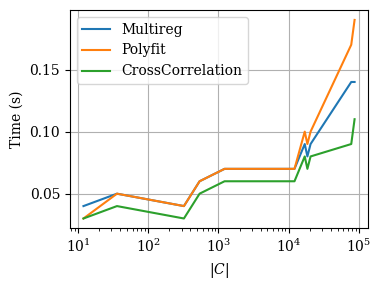

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
for model in ["Multireg", "Polyfit", "CrossCorrelation"]:
    gdf[gdf["model"] == model].plot(x='$|C|$', y='Time total', ax=ax, label=model)
ax.set_xscale('log')
ax.set_ylabel('Time (s)')
ax.set_xlabel('$|C|$')
ax.grid(True)
fig.tight_layout()

/tmp/ipykernel_186197/3024712031.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for model, group in df3.groupby(["model"]):
/tmp/ipykernel_186197/3024712031.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.reset_index().groupby(["measures"]).mean().reset_index().plot(ax=ax, label=model, x='measures', y='time_model_python')
/tmp/ipykernel_186197/3024712031.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.reset_ind

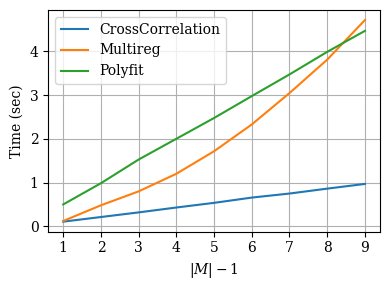

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
df3 = pd.read_csv('../../../resources/intention/explain_scalability_python.csv')
df3["time_model_python"] = df3["time_model_python"] / 1000
for model, group in df3.groupby(["model"]):
    group.reset_index().groupby(["measures"]).mean().reset_index().plot(ax=ax, label=model, x='measures', y='time_model_python')
ax.set_ylabel('Time (sec)')
ax.set_xlabel('$|M| - 1$')
ax.set_xticks([x for x in range(1, 10)])
ax.grid(True)
fig.tight_layout()
fig.savefig('../../../resources/intention/scalability.pdf')
fig.savefig('../../../resources/intention/scalability.svg')

In [112]:
df = pd.read_csv('../../../resources/intention/students.csv')
df.columns = ["OLAP", "Tableau", "I1-Multireg", "I1-Polyfit", "I1-Added Value", "I2-CrossCorr", "I2-Polyfit", "I2-Added Value", "User Experience"]
df

,OLAP,Tableau,I1-Multireg,I1-Polyfit,I1-Added Value,I2-CrossCorr,I2-Polyfit,I2-Added Value,User Experience
0,4,0,4,3,3,3,3,4,5
1,3,0,2,4,3,5,1,3,3
2,3,0,3,2,3,2,4,4,4
3,2,0,5,1,5,5,5,4,5
4,3,0,2,3,3,2,3,4,4
...,...,...,...,...,...,...,...,...,...
81,3,0,4,3,4,2,4,3,4
82,3,0,2,4,3,5,3,4,4
83,3,0,3,4,4,2,4,3,4
84,3,0,4,3,3,4,2,4,4


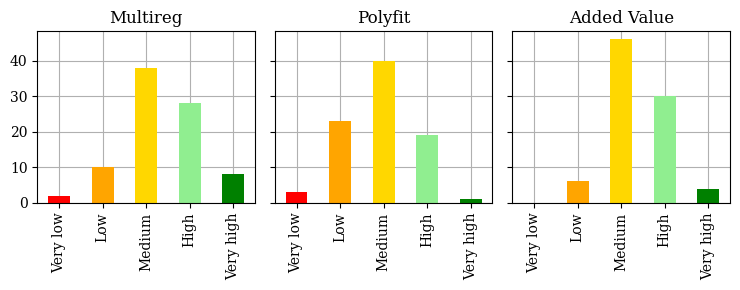

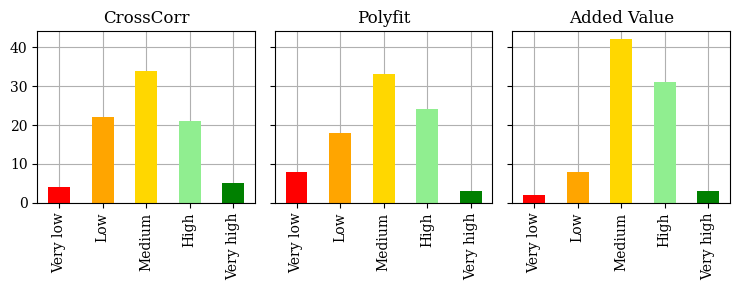

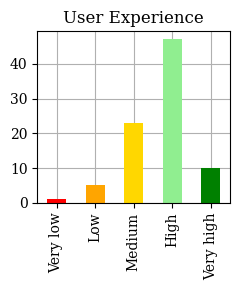

In [115]:
from matplotlib import cm

my_colors=["red", "orange", "gold", "lightgreen", "green"]


for xs in ["I1", "I2", "User Experience"]:
    l = [x for x in df.columns if xs in x]
    fig, ax = plt.subplots(1, len(l), figsize=(len(l) * 2.5, 3), sharey=True)
    i = 0
    for x in l:
        dff = pd.merge(df.groupby(x).size().reset_index(), pd.Series([1, 2, 3, 4, 5], name=x), on=x, how="right").drop(x, axis=1).rename({0: x}, axis=1).fillna(0)
        axs = ax if len(l) == 1 else ax[i]
        dff[x].plot(kind='bar', ax=axs, title=x.replace("I1-", "").replace("I2-", ""), legend=False, color=my_colors)
        axs.set_xticklabels(["Very low", "Low", "Medium", "High", "Very high"])
        axs.set_axisbelow(True)
        axs.grid()
        i += 1
    fig.tight_layout()
    fig.savefig("{}.svg".format(xs))
    fig.savefig("{}.pdf".format(xs))